**wfdb module - python**

https://wfdb.readthedocs.io/en/latest/index.html

In [1]:
!pip install wfdb
import wfdb
import os

# Downloading datasets from physionet

In [2]:
# getting list of all the databases
# wfdb.io.get_dbs()

In [3]:
 # Get a list of records belonging to a database.
# wfdb.get_record_list('mitdb')

In [5]:
!mkdir '/content/database'

db_dir : str
    The PhysioNet database directory to download. eg. For database: ‘http://physionet.org/content/mitdb/’, db_dir=’mitdb’.
    
dl_dir : str
    The full local directory path in which to download the files.

In [6]:
# downloading database
wfdb.dl_database('mitdb', '/content/database')

Generating record list for: 0001
Generating record list for: 0201
Generating list of all files for: 0001
Generating list of all files for: 0201
Finished downloading files


In [ ]:
#Download specified files from a PhysioNet database.
wfdb.dl_files('ahadb', os.getcwd(),
                  ['0001.hea',
                  '0001.dat'])

Finished downloading files


# Data processing

https://wfdb.readthedocs.io/en/latest/plot.html

In [13]:
#WFDB Records
record = wfdb.rdrecord('/content/100', sampto=200)

#WFDB Anotations
annotation = wfdb.rdann('/content/100', 'atr', sampto=200)

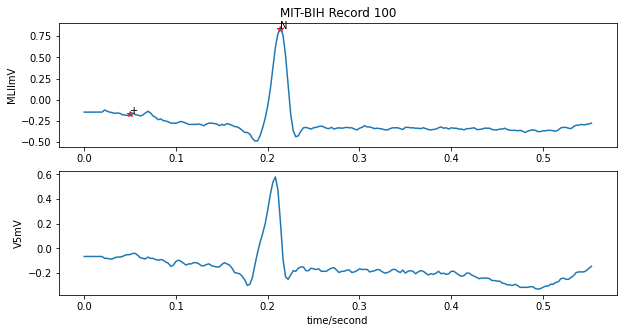

In [14]:
wfdb.plot_wfdb(record=record, annotation=annotation, plot_sym=True , 
                   time_units='seconds', title='MIT-BIH Record 100',
                   figsize=(10,5))

In [ ]:
ecg_record = wfdb.rdheader('/content/MIT-BIH- atr dat files-1/100')  #reads hea files
ecg_record

In [ ]:
signals, fields = wfdb.rdsamp('/content/MIT-BIH- atr dat files-1/100',
                                  sampfrom=800)
signals

array([[-0.295, -0.19 ],
       [-0.31 , -0.19 ],
       [-0.325, -0.21 ],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]])

In [ ]:
fields

{'base_date': None,
 'base_time': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'fs': 360,
 'n_sig': 2,
 'sig_len': 649200,
 'sig_name': ['MLII', 'V5'],
 'units': ['mV', 'mV']}

In [2]:
import wfdb
from wfdb import processing

**Finding local peaks**

In [5]:
#wfdb.processing.xqrs_detect(sig, fs, sampfrom=0, sampto='end', conf=None, learn=True, verbose=True)

#sig, fields = wfdb.rdsamp('/content/100', sampfrom=0,channels=[0])
sig, fields = wfdb.rdsamp('/content/100', sampfrom=0, sampto= 200 ,channels=[0])

wfdb.processing.find_local_peaks(sig, radius = 10)

array([  8,  25,  50,  77,  93, 110, 126, 140, 153, 165, 199])

**QRS detection**

```
>>> import numpy as np
>>> import wfdb
>>> from wfdb import processing

>>> # Detect using a physical input signal
>>> record = wfdb.rdrecord('sample-data/100', channels=[0])
>>> qrs_locs = processing.gqrs_detect(record.p_signal[:,0], fs=record.fs)

>>> # Detect using a digital input signal
>>> record_2 = wfdb.rdrecord('sample-data/100', channels=[0], physical=False)
>>> qrs_locs_2 = processing.gqrs_detect(d_sig=record_2.d_signal[:,0],
                                        fs=record_2.fs,
                                        adc_gain=record_2.adc_gain[0],
                                        adc_zero=record_2.adc_zero[0])

```





Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.


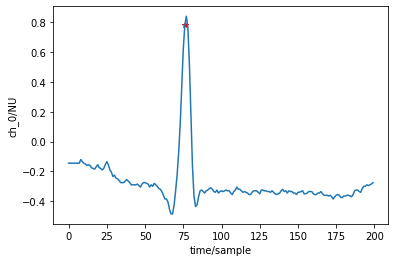

In [4]:
#wfdb.processing.xqrs_detect(sig, fs, sampfrom=0, sampto='end', conf=None, learn=True, verbose=True)

sig, fields = wfdb.rdsamp('/content/100', sampfrom=0, sampto= 200 ,channels=[0])
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])

**Annotation Evaluators**

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
703 reference annotations, 703 test annotations

True Positives (matched samples): 703
False Positives (unmatched test samples): 0
False Negatives (unmatched reference samples): 0

Sensitivity: 1.0000 (703/703)
Positive Predictivity: 1.0000 (703/703)


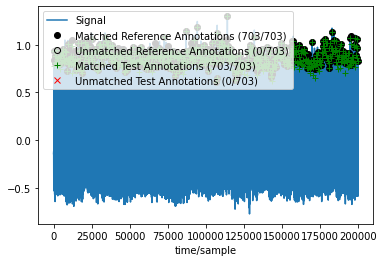

In [10]:
sig, fields = wfdb.rdsamp('100',sampfrom=0, sampto= 200000, channels=[0])
ann_ref = wfdb.rdann('100','atr' , sampfrom=0, sampto= 200000,)
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()

comparitor = processing.compare_annotations(ann_ref.sample[1:],
                                                xqrs.qrs_inds,
                                                int(0.1 * fields['fs']),
                                                sig[:,0])
comparitor.print_summary()

comparitor.plot()